# Simulasi Algoritma Monte Carlo di Pemrograman

### Menghitung Luas Lingkaran

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def luas_lingkaran(r):
    luas = math.pi * r * r
    return f"Luas lingkaran dengan jari-jari {r} adalah {r*r}\u03C0 = {luas:.3f}"

def gambar_lingkaran_dan_persegi_sesuai_jari_jari(jari_jari, pusat_x, pusat_y):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = jari_jari * np.cos(theta) + pusat_x 
    y = jari_jari * np.sin(theta) + pusat_y 

    plt.figure(figsize=(6,6))
    plt.plot(x, y, label=f'Lingkaran dengan jari-jari {jari_jari} dan pusat ({pusat_x}, {pusat_y})')

    persegi_x = [pusat_x - jari_jari, pusat_x + jari_jari, pusat_x + jari_jari, pusat_x - jari_jari, pusat_x - jari_jari]
    persegi_y = [pusat_y - jari_jari, pusat_y - jari_jari, pusat_y + jari_jari, pusat_y + jari_jari, pusat_y - jari_jari]
    
    plt.plot(persegi_x, persegi_y, color='red', label='Persegi sesuai jari-jari')

    plt.xlim(pusat_x - jari_jari - 1, pusat_x + jari_jari + 1)
    plt.ylim(pusat_y - jari_jari - 1, pusat_y + jari_jari + 1)

    plt.axhline(pusat_y, color='black', linewidth=0.5)
    plt.axvline(pusat_x, color='black', linewidth=0.5) 
    
    # Memberi label
    plt.xlabel('Sumbu X')
    plt.ylabel('Sumbu Y')
    plt.title(f'Lingkaran pada ({pusat_x}, {pusat_y}) dengan jari-jari {jari_jari}')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.show()

def cari_batas(r, pusat_x, pusat_y):
    x_min = -r + pusat_x
    x_max = r + pusat_x
    y_min = -r + pusat_y
    y_max = r + pusat_y
    return x_min, x_max, y_min, y_max

def print_cari_batas(r, pusat_x, pusat_y):
    x_min, x_max, y_min, y_max = cari_batas(r, pusat_x, pusat_y)
    batas_x = f'Batas x: {x_min} < X < {x_max}'
    batas_y = f'Batas y: {y_min} < X < {y_max}'
    return batas_x, batas_y

def tentukan_formula_batas(r, batas_atas, batas_bawah):
    return f'{(batas_atas - batas_bawah)}xR+{batas_bawah}'


def simulasi_monte_carlo(r, pusat_x, pusat_y, jumlah_poin):
    data = []
    titik_dalam_lingkaran = 0
    
    x_min, x_max, y_min, y_max = cari_batas(r, pusat_x, pusat_y)
    
    for _ in range(jumlah_poin):
        random_x = np.random.random(1)
        random_y = np.random.random(1)
        
        nilai_x = (x_max - x_min) * random_x + x_min
        nilai_y = (y_max - y_min) * random_y + y_min
        
        squared_sum = nilai_x**2 + nilai_y**2
        
        di_dalam_lingkaran = "Iya" if squared_sum <= r**2 else "Tidak"
        
        if di_dalam_lingkaran == "Iya":
            titik_dalam_lingkaran += 1
        
        data.append([random_x, random_y, nilai_x, nilai_y, squared_sum, di_dalam_lingkaran])
        
    df = pd.DataFrame(data, columns=['R1', 'R2', 'Q(x)', 'Q(Y)', 'X**2 + Y**2', 'Apakah di dalam lingkaran?'])
    
    luas_kotak = (2 * r) ** 2
    luas_lingkaran_simulasi = (titik_dalam_lingkaran / jumlah_poin) * luas_kotak
    return df, luas_lingkaran_simulasi


Algoritma Monte Carlo
Luas Lingkaran = Luas lingkaran dengan jari-jari 4 adalah 16π = 50.265


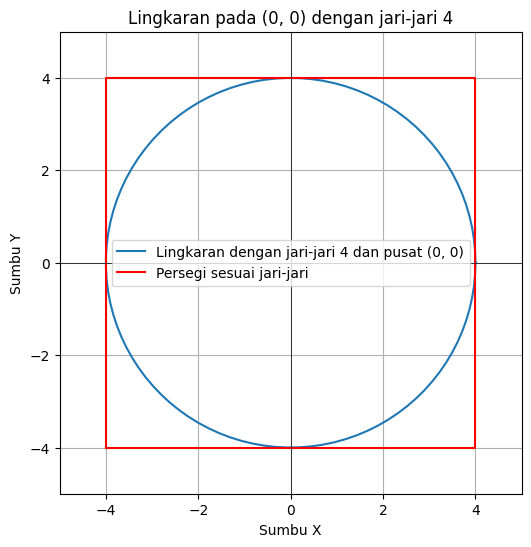

Batas x: -4 < X < 4
Batas y: -4 < X < 4
Formula untuk batas atas dan bawah X adalah 8xR+-4
Formula untuk batas atas dan bawah Y adalah 8xR+-4
Luas lingkaran simulasi adalah 44.800


In [3]:
print("Algoritma Monte Carlo")
input_jari_jari = eval(input("Masukkan jari-jari lingkaran: "))
input_pusat_x = int(input("Masukkan pusat X: "))
input_pusat_y = int(input("Masukkan pusat Y: "))
print(f'Luas Lingkaran = {luas_lingkaran(input_jari_jari)}')
gambar_lingkaran_dan_persegi_sesuai_jari_jari(input_jari_jari, pusat_x=input_pusat_x, pusat_y=input_pusat_y)
batas_x, batas_y = print_cari_batas(input_jari_jari, input_pusat_x, input_pusat_y)
print(batas_x)
print(batas_y)
x_min, x_max, y_min, y_max = cari_batas(input_jari_jari, input_pusat_x, input_pusat_y)
Z_x = tentukan_formula_batas(input_jari_jari, x_max, x_min)
Z_y = tentukan_formula_batas(input_jari_jari, y_max, y_min)
print(f"Formula untuk batas atas dan bawah X adalah {Z_x}")
print(f"Formula untuk batas atas dan bawah Y adalah {Z_y}")
jumlah_simulasi = int(input("Masukkan jumlah simulasi: "))
df_results, luas_lingkaran_simulasi = simulasi_monte_carlo(input_jari_jari, input_pusat_x, input_pusat_y, jumlah_simulasi)
df_results['Apakah di dalam lingkaran?'].value_counts()
print(f"Luas lingkaran simulasi adalah {luas_lingkaran_simulasi:.3f}")

In [4]:
df_results

,R1,R2,Q(x),Q(Y),X**2 + Y**2,Apakah di dalam lingkaran?
0,[0.9414252393945445],[0.41148624469634054],[3.531401915156356],[-0.7081100424292757],[12.97221931855917],Iya
1,[0.4422968609629925],[0.3719354279384106],[-0.4616251122960602],[-1.024516576492715],[1.2627319598107034],Iya
2,[0.7726288078740264],[0.9671843007891284],[2.1810304629922115],[3.7374744063130274],[18.725608818344938],Tidak
3,[0.9801648894198566],[0.5189675276654366],[3.8413191153588526],[0.15174022132349307],[14.778757640788621],Iya
4,[0.39558987919301736],[0.20328226088320633],[-0.8352809664558611],[-2.3737419129343493],[6.332344962144662],Iya
5,[0.11350791543120309],[0.5803005625574221],[-3.0919366765503753],[0.642404500459377],[9.972755954007841],Iya
6,[0.82971474359843],[0.0649103023314146],[2.63771794878744],[-3.4807175813486833],[19.072950858465248],Tidak
7,[0.3196878207775983],[0.478878512137075],[-1.4424974337792138],[-0.16897190290340003],[2.109350350430413],Iya
8,[0.15882868066142575],[0.14782473770102023],[-2.729370554708594],[-2.817402098391838],[15.387218208933032],Iya
9,[0.9453073697580272],[0.045428020176679684],[3.5624589580642176],[-3.6365758385865625],[25.91579765768355],Tidak


In [ ]:
df_results.to_csv('monte_carlo.csv', index=False)

In [8]:
df_results['Apakah di dalam lingkaran?'].value_counts()

Apakah di dalam lingkaran?
Iya      785152
Tidak    214848
Name: count, dtype: int64